In [2]:
import sys
sys.path.append('..')
from analysis.model_performances import *
from common import *
from helpers import *

In [4]:
answer_type = TRUE_FALSE_ANSWER_TYPE #FREE_ANSWER#
score_key = ACCURACY_SCORE_KEY #F1_SCORE_KEY#'accuracy'
answer_type_ext = tf_answer_type(score_key = score_key)

stats_all = collect_stats_all(tf_answer_type(score_key = score_key), save_main_dir=SAVE_MAIN_DIR)
print(len(stats_all))

save_dir = os.path.join(SAVE_MAIN_DIR, 'plots', 'by_length')
os.makedirs(save_dir, exist_ok=True)

100%|██████████| 48384/48384 [00:02<00:00, 21928.48it/s]

5154


In [5]:
plan_length = 19
model_name = 'gpt-4o' #'gemini' #'gemma-2b-it'
prompt_type = 'few_shot_1'
categories = QUESTION_CATEGORIES
subs = WITHOUT_RANDOM_SUB

In [7]:
# def filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain,
#                            answer_type, substitutions):
#     filter_by = base_filter(ramifications, model_name, prompt_type, answer_type, substitutions)
#     filter_by.extend([(OUT_OBJ_QUESTION_CATEGORY, {question_category}),
#                       (OUT_OBJ_DOMAIN_NAME, {domain}),
#                       (OUT_OBJ_PLAN_LENGTH, {plan_length})])
# 
#     results = filter_gather(stats_all, filter_by)
#     if len(results) == 0:
#         return None
#     elif not len(results) == 1:
#         raise ValueError(f'len(instance) == {len(results)}')
#     else:
#         return results[0]#[SK_RESULT]

# By Domain

by domain.gpt-4o.few shot 1.without random sub.without ramifications.pl-19


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

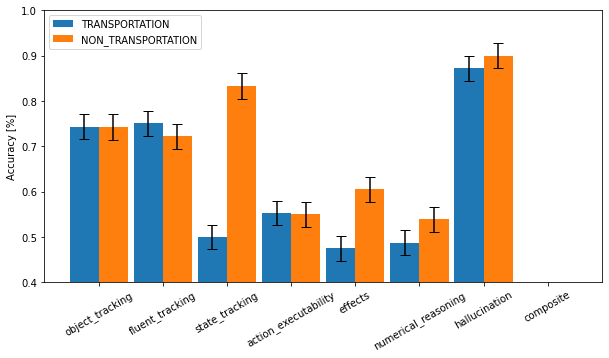

In [8]:
ramifications = WITHOUT_RAMIFICATIONS

data_all = []
for domain in [TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAIN_KEY]:
    plt.figure()
    data = {NAME_KEY: domain, DATA_KEY: [], ERROR_KEY: []}
    for question_category in categories:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
            if res:
                data[DATA_KEY].append(res[SK_RESULT])
                data[ERROR_KEY].append(res[SK_RESULT_OTHER]['sem'])
            else:
                data[DATA_KEY].append(None)
                data[ERROR_KEY].append(None)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('Accuracy [%]')
plt.ylim([0.4,1])
file_name = f'by_domain.{model_name}.{prompt_type}.{subs}.{ramifications}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{file_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')

print(file_name.replace('_', ' '))

In [9]:
data_all

[{'name': 'TRANSPORTATION',
  'data': [0.7431906614785992,
   0.7509727626459144,
   0.5,
   0.5526315789473685,
   0.47468354430379744,
   0.48717948717948717,
   0.8717948717948718,
   None],
  'error': [0.027251409285630048,
   0.026975466041049577,
   0.08838834764831843,
   0.08066009201997748,
   0.03972684239627369,
   0.0800377530231858,
   0.05353373566291199,
   None]},
 {'name': 'NON_TRANSPORTATION',
  'data': [0.7425373134328358,
   0.7215686274509804,
   0.8333333333333334,
   0.55,
   0.6050955414012739,
   0.5384615384615384,
   0.9,
   None],
  'error': [0.026708462770349738,
   0.028069056532513625,
   0.1075828707279838,
   0.07866066361276135,
   0.03901289409399972,
   0.07982684948658013,
   0.04743416490252569,
   None]}]


# By Ramifications

by ramifications.gpt-4o.few shot 1.without random sub.ALL DOMAINS.pl-19


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

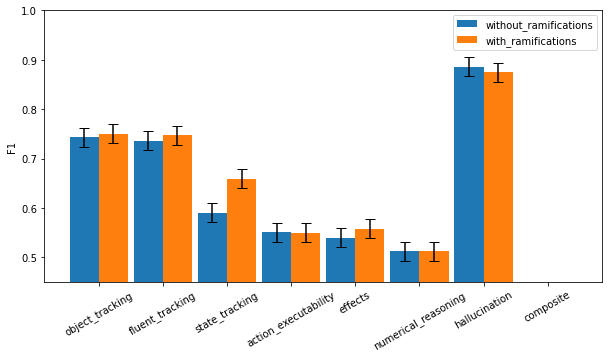

In [10]:
domain = ALL_DOMAINS_KEY

data_all = []
for ramifications in RAMIFICATION_TYPES:
    plt.figure()
    data = {NAME_KEY: ramifications, DATA_KEY: [], ERROR_KEY: []}
    for question_category in categories:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
            if res:
                data[DATA_KEY].append(res[SK_RESULT])
                data[ERROR_KEY].append(res[SK_RESULT_OTHER]['sem'])
            else:
                data[DATA_KEY].append(None)
                data[ERROR_KEY].append(None)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.45,1])

save_name = f'by_ramifications.{model_name}.{prompt_type}.{subs}.{domain}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('_', ' '))

# By Subs

by subs.gpt-4o.few shot 1.ALL DOMAINS.with ramifications.pl-19


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

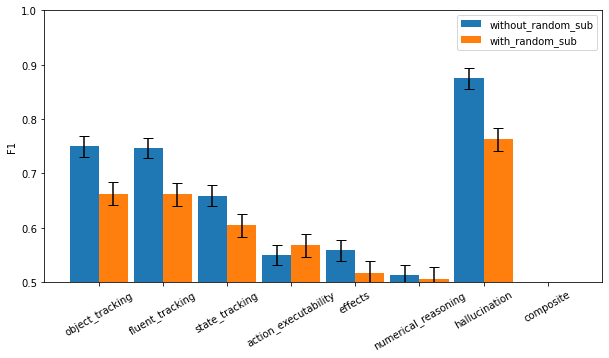

In [11]:
domain = ALL_DOMAINS_KEY
ramifications = WITH_RAMIFICATIONS

data_all = []
for subs in SUBSTITUTION_TYPES:
    plt.figure()
    data = {NAME_KEY: subs, DATA_KEY: [], ERROR_KEY: []}
    for question_category in categories:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
            if res:
                data[DATA_KEY].append(res[SK_RESULT])
                data[ERROR_KEY].append(res[SK_RESULT_OTHER]['sem'])
            else:
                data[DATA_KEY].append(None)
                data[ERROR_KEY].append(None)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.5,1])

save_name = f'by_subs.{model_name}.{prompt_type}.{domain}.{ramifications}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('_', ' '))